# Tarea 3: Optimización y análisis básico de funciones
Profesora: Dr. Rodrigo López Farías  
Alumno: Colvert Gomez Rubio

1. Encontrar la dirección de máximo descenso de gradiente para la función $f(\mathbf{x}) = \sum_{i=1}^2x^2_i $. Utilizando la derivada parcial direccional para los valores de $\mathbf{x}$. Mostrar procedimiento completo. (20/100)

    1. $\mathbf{x} = [1,1]^T$ (10/100)
    2. $\mathbf{x} = [0,0]^T$ (10/100)

2. Derivar el método de optimización de Newton a partir de las series de Taylor (A partir de la Ecuación 4.11 llegar a la expresión 4.12). (10/100)

3. Comparar la función $f(x)$ original con la aproximación (con* alguna función vista en clase o alguna otra, sin usar los mismos ejemplos) utilizando serie de Taylor alrededor de de un punto $x_0$. (Utilizar ```matplotlib.pyplot``` de ```Python ```).  (10/100)

4. Dada las funciones (adjuntas en esta publicación):  (60/100)
    
    a) Ackley
    b) Adjiman
    
    4.1 Calcular sus derivadas parciales. (10/100)
    
    4.2 Calcular sus Hessianos. (10/100)
    
    4.3 Minimizarlas con algoritmo de Descenso de Gradiente calculando $\epsilon$ óptimo utilizando la serie de Taylor. Mostrar gráfica de convergencia en un plot y  sobre las curvas de nivel. (20/100)
    
    4.4 Minimizarlas con algoritmo de Newton. Mostrar gráfica de convergencia en un plot y  sobre las curvas de nivel.(20/100)
   
Ejercicio Extra (no cuenta).

A partir de la serie de Taylor, describir los pasos necesarios para llegar a la solución del tasa de aprendizaje $\epsilon^* = \frac{\mathbf{g}^T\mathbf{g}}{\mathbf{g}^T\mathbf{H}\mathbf{g}}$ (Ecuación 4.10 del Libro de Deep Learning de Goodfellow).
   
Notas:

El ejercicio 1,2 puede Entregarse en escaneo de papel, markdown con ecuaciones en Latex, libreta de Python.
Ejercicio 3 Hacer y entregar en libreta de Python.
Ejercicio 4 Hacer y entregar en libreta de Python, los ejercicios de derivadas entregar en escaneo de notas en papel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3 **Serie de Taylor para la función $f(\mathbf{x})=x^3+x^2-x+1$ alrededor de un punto $f(\mathbf{x_0})=-0$**

In [2]:
def f(x):
    return x**3+x**2-x+1

def df(x):
    return 3*x**2+2*x-1
    
def ddf(x):
    return 6*x+2
    
def taylor(x,x0):
    d = x-x0
    return f(x0)+d*df(x0)+0.5*d*ddf(x0)*d

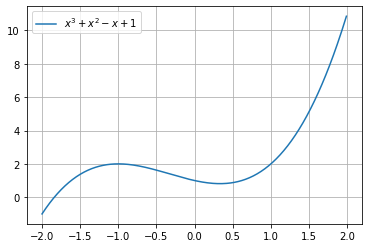

In [3]:
x = np.arange(-2,2,0.01)
y = [f(i) for i in x]
plt.plot(x,y,label='$x^3+x^2-x+1$')
plt.grid()
plt.legend()
plt.show()

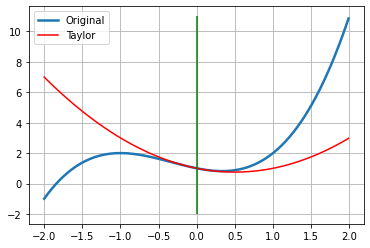

In [4]:
xc=0
local_range = 2
x = np.arange(xc-local_range,xc+local_range,0.01)

plt.plot(x,[f(i) for i in x],linewidth=2.5,label='Original')
plt.plot(x,[taylor(i,x0=xc) for i in x],color='red',label='Taylor')
plt.vlines(x=xc,ymin=-2,ymax=f(xc+local_range),color='green')
plt.grid()
plt.legend()
plt.show()

# 4 

## a) Ackley

In [5]:
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
# función Ackley 
def fackley(X):
    e = np.exp(-0.2*((X[0]**2+X[1]**2)**(0.5)))
    return (-200*e)

# Derivada de Ackley
def dackley(X):
    e = np.exp(-0.2*((X[0]**2+X[1]**2)**(0.5)))
    
    #d f/ d x
    pd1 = (40*X[0]*e)/((X[0]**2+X[1]**2)**(0.5)) #derivada parcial de f respecto a x0
    
    #d f/ d y
    pd2 = (40*X[1]*e)/((X[0]**2+X[1]**2)**(0.5)) #Derivada parcial de f especto a x1
    
    return [pd1,pd2]

def hackley(X):
    e = np.exp(-0.2*((X[0]**2+X[1]**2)**(0.5)))
    r = (X[0]**2+X[1]**2)**(0.5)
    
    #2da Derivada parcial de X[0]
    dx0x0 = 40*(((((-0.2*X[0]**2*e/r)+e)*r)-((X[0]/r)*X[0]*e))/(X[0]**2+X[1]**2))
    
    #2da Derivada parcial de X[1]
    dx1x1 = 40*(((((-0.2*X[1]**2*e/r)+e)*r)-((X[1]/r)*X[1]*e))/(X[0]**2+X[1]**2))
    
    #2da Derivada parcial de X[1] respecto X[0]
    dx1x2 = (40*X[0]*((-0.2*X[1]*np.exp(r))-(X[1]*e/r)))/(X[0]**2+X[1]**2)
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    M = np.array([[dx0x0,dx1x2],[dx1x2,dx1x1]])
    
    return M

#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapackley(x,y):
    X = [x,y]
    return fackley(X)

In [7]:
#rango
r_min,r_max = -15, 15


#ejes
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
z = wrapackley(x, y)

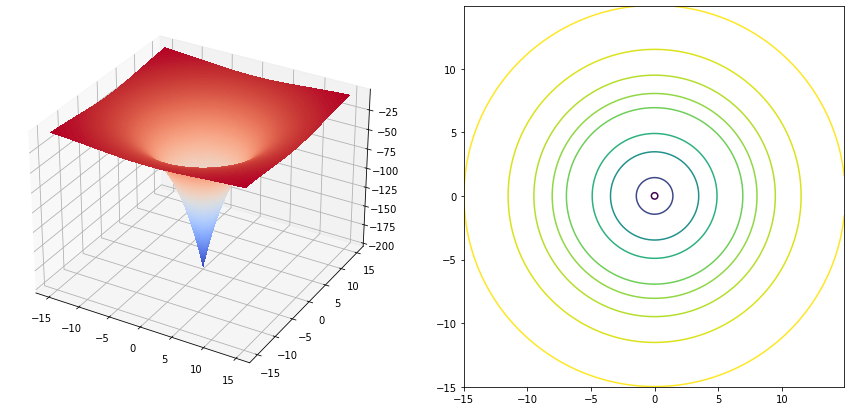

In [8]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, z,[-190,-150,-100,-75,-50,-40,-30,-20,-10])

plt.show()

#### Desenso de gradiente normal

In [9]:
#solución inicial x_0
X = [-10,8]

e =0.001

apt = list([])
sol = list([])

for i in range(3000):
    apt.append(fackley(X))
    sol.append(list(X))
    
    X_next = X - e*np.array(dackley(X))
    
    X = X_next

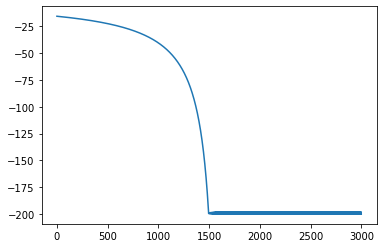

In [10]:
plt.plot(apt)

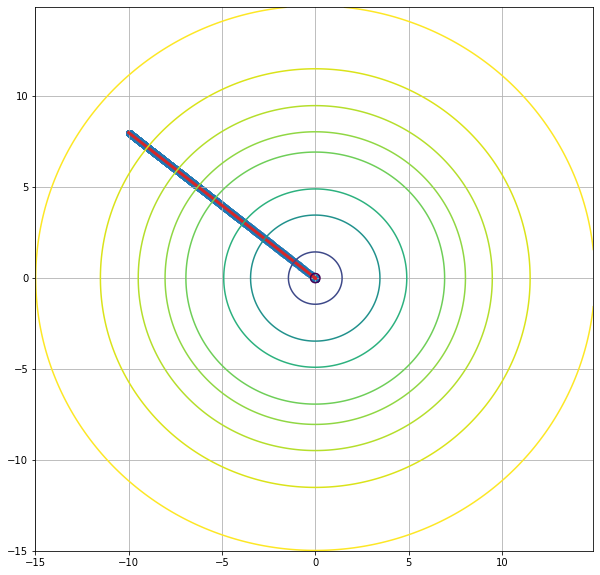

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-190,-150,-100,-75,-50,-40,-30,-20,-10])
plt.grid()
plt.show()

#### Descenso de gradiente con e optima por medio de Taylor

In [12]:
#solución inicial x_0
X = [4,3]

apt = list([])
sol = list([])

for i in range(35):
    
    apt.append(fackley(X))
    sol.append(list(X))
    
    g = np.array(dackley(X))
    h = np.array(hackley(X))
    
    e = -(np.matmul(g,g)/(np.matmul(h,g)@g))

    X_next = X - e*np.array(dackley(X))
    
    X = X_next

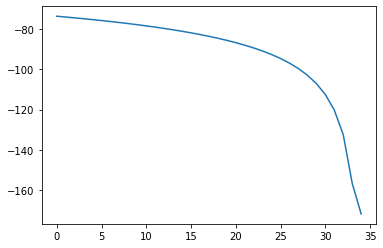

In [13]:
plt.plot(apt)

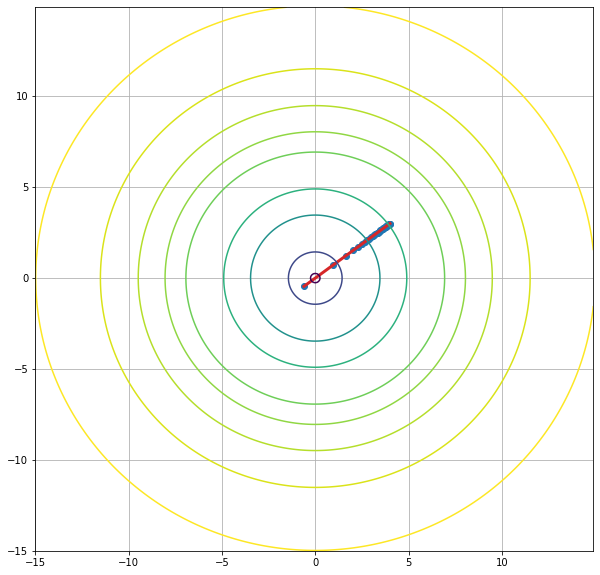

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-190,-150,-100,-75,-50,-40,-30,-20,-10])
plt.grid()
plt.show()

#### Descenso de gradiente con Newton

In [15]:
X = [4,3]

aptn = list([])
soln = list([])

for i in range(40):
    aptn.append(fackley(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hackley(X))
    X_next = X + Hinv@np.array(dackley(X))
    
    X = X_next

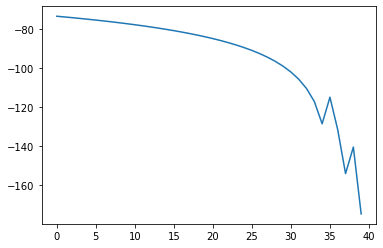

In [16]:
plt.plot(aptn)

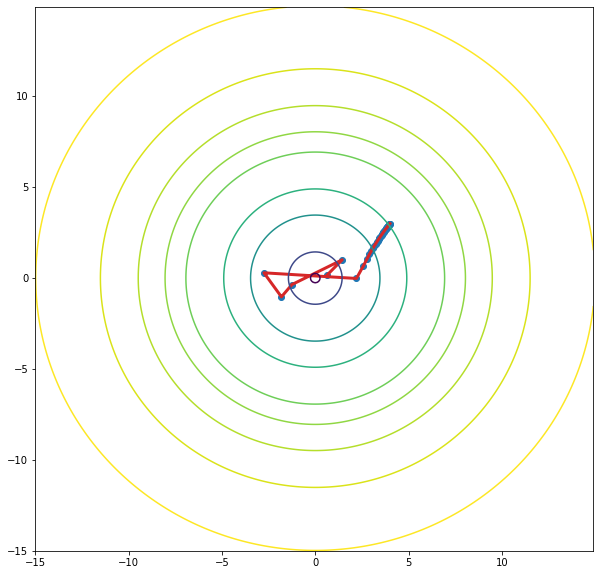

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-190,-150,-100,-75,-50,-40,-30,-20,-10])
plt.show()

## b) Adjiman

In [18]:
# función Adjiman
def fadjiman(X):
    return (np.cos((X[0]))*np.sin((X[1]))-(X[0]/(X[1]**2+1)))

# Derivada de Adjiman
def dadjiman(X):

    #d f/ d x
    pd1 = -np.sin(X[1])*np.sin(X[0])-(1/((X[1]**2)+1)) #derivada parcial de f respecto a x0
    
    #d f/ d y
    pd2 = np.cos(X[0])*np.cos(X[1])+(2*X[0]*X[1]/((X[1]**2+1)**2)) #Derivada parcial de f especto a x1
    
    return [pd1,pd2]

def hadjiman(X):
    e = np.exp(-0.2*((X[0]**2+X[1]**2)**(0.5)))
    r = (X[0]**2+X[1]**2)**(0.5)
    
    #2da Derivada parcial de X[0]
    dx0x0 = -np.sin(X[1])*np.cos(X[0])
    
    #2da Derivada parcial de X[1]
    dx1x1 = -np.cos(X[0])*np.sin(X[1])+(2*X[0]*(-3*X[1]**2+1)/((X[1]**2+1)**3))
    
    #2da Derivada parcial de X[1] respecto X[0]
    dx1x2 = -np.sin(X[0])*np.cos(X[1])+(2*X[1]/((X[1]**2+1)**2))
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    M = np.array([[dx0x0,dx1x2],[dx1x2,dx1x1]])
    
    return M

#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapadjiman(x,y):
    X = [x,y]
    return fadjiman(X)

In [19]:
#rango
r_min,r_max = -1, 2


#ejes
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
z = wrapadjiman(x, y)

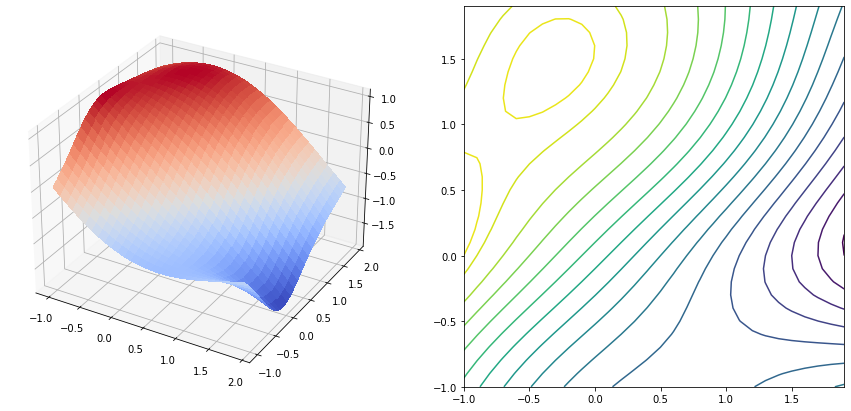

In [20]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, z,[-1.9,-1.7,-1.5,-1.3,-1.1,-.9,-.7,-.5,-.3,-.1,.1,.3,.5,.7,.9,1,1.1])

plt.show()

#### Desenso de gradiente normal

In [21]:
#solución inicial x_0
X = [-0.4,1.2]

e =0.001

apt = list([])
sol = list([])

for i in range(3600):
    apt.append(fadjiman(X))
    sol.append(list(X))
    
    X_next = X - e*np.array(dadjiman(X))
    
    X = X_next

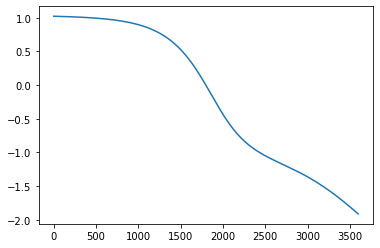

In [22]:
plt.plot(apt)

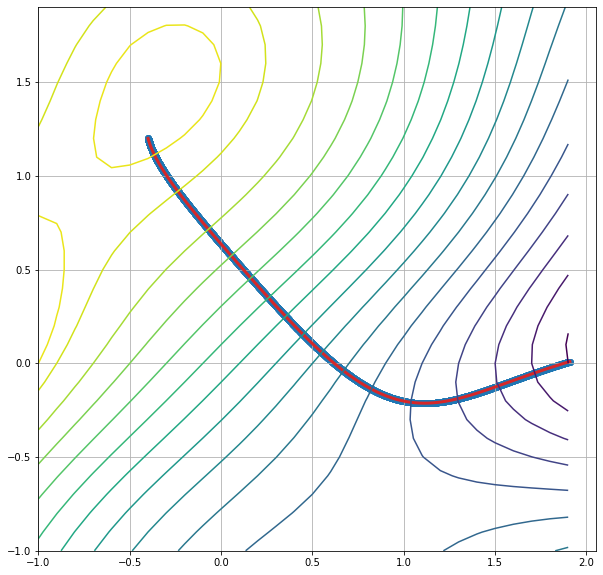

In [23]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-1.9,-1.7,-1.5,-1.3,-1.1,-.9,-.7,-.5,-.3,-.1,.1,.3,.5,.7,.9,1,1.1])
plt.grid()
plt.show()

#### Descenso de gradiente con e optima por medio de Taylor

In [24]:
#solución inicial x_0
X = [-0.4,1.2]

apt = list([])
sol = list([])

for i in range(5):
    
    apt.append(fadjiman(X))
    sol.append(list(X))
    
    g = np.array(dadjiman(X))
    h = np.array(hadjiman(X))
    
    e = -(np.matmul(g,g)/(np.matmul(h,g)@g))

    X_next = X - e*np.array(dadjiman(X))
    
    X = X_next

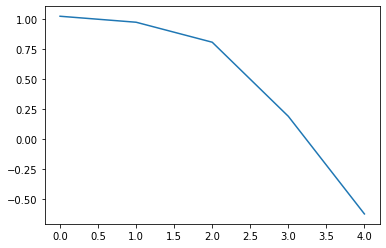

In [25]:
plt.plot(apt)

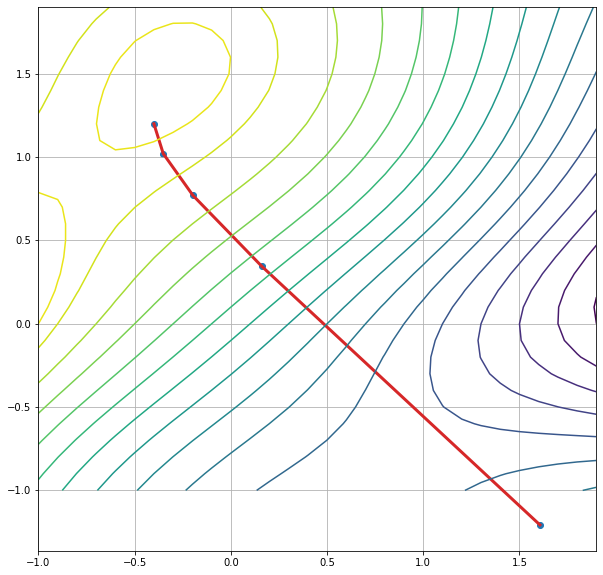

In [26]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-1.9,-1.7,-1.5,-1.3,-1.1,-.9,-.7,-.5,-.3,-.1,.1,.3,.5,.7,.9,1,1.1])
plt.grid()
plt.show()

#### Descenso de gradiente con Newton

In [27]:
X = [-0.4,1.2]

aptn = list([])
soln = list([])

for i in range(5):
    aptn.append(fadjiman(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hadjiman(X))
    X_next = X + Hinv@np.array(dadjiman(X))
    
    X = X_next

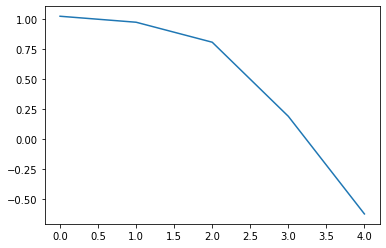

In [28]:
plt.plot(apt)

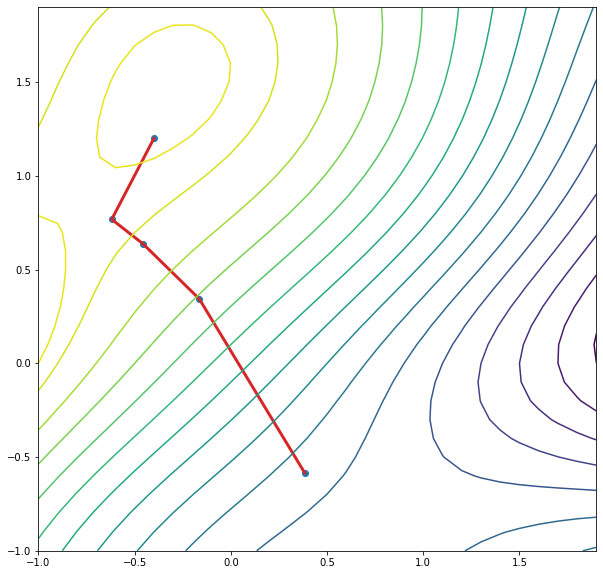

In [29]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, z,[-1.9,-1.7,-1.5,-1.3,-1.1,-.9,-.7,-.5,-.3,-.1,.1,.3,.5,.7,.9,1,1.1])
plt.show()